# What's happening on roads of Bangalore?

### In this notebook, accident trends on Bangalore (or Bengaluru) roads has been analyzed, based on the data collected by Intel's Collision Detection System sensors installed in buses.

#### Disclaimer: The dataset used for this analysis is downloaded from [public dataset in Kaggle](https://www.kaggle.com/apoorvwatsky/bangalore-accident-data/). Basic analysis of the dataset reaveals multiple limitations, including but not limited to:
1. Data is available only for year 2018.
2. In 2018, data for only the months of February, March, April, June and July are present.
3. Over any day, data between 6M and 6PM is only availble. On roads of a city like Bangalore, data beyond 6PM late into the evening is important, which is missing.
4. To summarize, the dataset is not very reliable. Nevertheless, it is a good one to start basic analysis and understand the high level trends of road related incidents in Bangalore.

<div class='pixels-photo'>
  <p>
    <img src='https://drscdn.500px.org/photo/12002497/m%3D900/v2?user_id=794220&webp=true&sig=e67615f98bced0d04266b7d7474f1574f43545571fea1afb0efc4b491df9ca23' alt='Speed by Supratim Haldar on 500px.com'>
  </p>
  <a href='https://500px.com/photo/12002497/speed-by-supratim-haldar' alt='Speed by Supratim Haldar on 500px.com'></a>
</div>

<script type='text/javascript' src='https://500px.com/embed.js'></script>
Image: High speed traffic on NICE Road, Bangalore. 
<br>Source: https://500px.com/photo/12002497/speed-by-supratim-haldar

## Introduction
Traffic on roads of Bangalore is not among the best in cities of India, and a recent study by Ola Cabs have confirmed the same - the average speed of vehicles at peak hours is approx 15.5 KM/hr, which is 3rd from bottom ranking among Indian cities. But there are pockets where traffic moves at high speed as well, parts of city where number of accidents or potential accidents is high, at the same time at other places it is pretty low. Through EDA of this dataset, let us try to unravel some interesting observations about roads of Bangalore.

Before further processing, it is important to understand the types of alarms captured by CDS.
* <b style="color:blue">FORWARD COLLISION WARNINGS (FCW)</b>
<br>A FCW alerts drivers of an imminent rear-end collision with a car, truck, or motorcycle.
* <b style="color:blue">URBAN FORWARD COLLISION WARNINGS (UFCW)</b>
<br>UFCW provides an alert before a possible low-speed collision with the vehicle in front, thus assisting the driver at a low speed in densely heavy traffic. This is usually applicable when driving under approx 30 kmph.
* <b style="color:blue">HEADWAY MONITORING WARNING (HMW)</b>
<br>The headway monitoring warning (HMW) helps drivers maintain a safe following distance from the vehicle ahead of them by providing visual and audible alerts if the distance becomes unsafe. Active above 30 kmph, this sensor generates alarm and displays the amount of time, in seconds, to the vehicle in front when that time becomes 2.5 seconds or less.
* <b style="color:blue">LANE DEPARTURE WARNINGS (LDW)</b>
<br>The LDW provides an alert when the vehicle unintentionally departs from the driving lane without using the turn signals. If the turn signals are used when changing lanes, an alert is not generated. Usually active above 55 kmph, LDW might not work well if lanes are unmarked or poorly marked.
<br>This is further classified into: (a) LDWL, for lane departures towards left lane and (b) LDWR, for the same towards right lane.
* <b style="color:blue">PEDESTRIANS AND CYCLIST DETECTION AND COLLISION WARNING (PCW)</b>
<br>The PCW notifies the driver of a pedestrian or cyclist in the danger zone and alerts drivers of an imminent collision with a pedestrian or cyclist. PCW works well when vehicle is below 50 kmph.
* <b style="color:blue">OVERSPEEDING</b>
<br>Detects and classifies various visible speed limit signs and provides visual indication when the vehicle’s speed exceeds the posted speed limit.

#### Now, let's get started. Following are the steps followed:
1. Read data.
2. Preprocess and cleanup data.
3. Data analysis through visualisation.

## Step 1 : Read data

In [93]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap

# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [94]:
# Read the input training and test data
input_data_dir = "C:\Study\DataSets\\bangalore-accident-data"
input_data_file = "bangalore-cas-alerts.csv"
input_data_path = os.path.join(input_data_dir, input_data_file)
train_data = pd.read_csv(input_data_path)
train_data.head(10)

deviceCode_deviceCode  deviceCode_location_latitude  \
0        864504031502210                     12.984595   
1        864504031502210                     12.984595   
2        864504031502210                     12.987233   
3        864504031502210                     12.987233   
4        864504031502210                     12.987503   
5        864504031502210                     12.987503   
6        864504031502210                     12.987523   
7        864504031502210                     12.987523   
8        864504031502210                     12.988210   
9        864504031502210                     12.988210   

   deviceCode_location_longitude deviceCode_location_wardName  \
0                      77.744087                     Kadugodi   
1                      77.744087                     Kadugodi   
2                      77.741119             Garudachar Playa   
3                      77.741119             Garudachar Playa   
4                      77.740051                         Hudi   
5                      77.740051                         Hudi   
6                      77.736702                     Kadugodi   
7                      77.736702                     Kadugodi   
8                      77.731369                         Hudi   
9                      77.731369                         Hudi   

  deviceCode_pyld_alarmType  deviceCode_pyld_speed  \
0                       PCW                     32   
1                       PCW                     32   
2                       FCW                     41   
3                       FCW                     41   
4                 Overspeed                     37   
5                 Overspeed                     37   
6                       HMW                     32   
7                       HMW                     32   
8                 Overspeed                     27   
9                 Overspeed                     27   

  deviceCode_time_recordedTime_$date  
0           2018-02-01T01:48:59.000Z  
1           2018-02-01T01:48:59.000Z  
2           2018-02-01T01:50:00.000Z  
3           2018-02-01T01:50:00.000Z  
4           2018-02-01T01:50:11.000Z  
5           2018-02-01T01:50:11.000Z  
6           2018-02-01T01:50:50.000Z  
7           2018-02-01T01:50:50.000Z  
8           2018-02-01T01:52:26.000Z  
9           2018-02-01T01:52:26.000Z

In [95]:
train_data.shape

(207617, 7)

## Step 2 : Pre-process and cleanup data

### A glance at the above data clearly reveals existence of multiple duplicate rows (eg: rows 0 and 1, rows 2 and 3, etc.). The duplicacy exists across all rows, hence let's remove those data.

In [96]:
# Remove duplicates and check dataset size
train_data.drop_duplicates(inplace=True)
train_data.shape

(152276, 7)

### The size of data reduced from 207617 rows to 152276. Hence, 55341 rows were duplicate, which is pretty high number.

In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152276 entries, 0 to 207616
Data columns (total 7 columns):
deviceCode_deviceCode                 152276 non-null int64
deviceCode_location_latitude          152276 non-null float64
deviceCode_location_longitude         152276 non-null float64
deviceCode_location_wardName          152276 non-null object
deviceCode_pyld_alarmType             152276 non-null object
deviceCode_pyld_speed                 152276 non-null int64
deviceCode_time_recordedTime_$date    152276 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 9.3+ MB


### Apparently, there is no missing data, which is good news. We'll see later if any attribute has invalid vales.

In [98]:
train_data.describe().transpose()

count          mean           std  \
deviceCode_deviceCode          152276.0  8.641311e+14  2.963658e+11   
deviceCode_location_latitude   152276.0  1.297075e+01  2.663822e-02   
deviceCode_location_longitude  152276.0  7.772170e+01  2.972414e-02   
deviceCode_pyld_speed          152276.0  2.214478e+01  1.371225e+01   

                                        min           25%           50%  \
deviceCode_deviceCode          8.620100e+14  8.639770e+14  8.639770e+14   
deviceCode_location_latitude   1.268666e+01  1.295651e+01  1.297310e+01   
deviceCode_location_longitude  7.750818e+01  7.770688e+01  7.772740e+01   
deviceCode_pyld_speed          0.000000e+00  1.100000e+01  2.200000e+01   

                                        75%           max  
deviceCode_deviceCode          8.645040e+14  8.645040e+14  
deviceCode_location_latitude   1.298773e+01  1.307008e+01  
deviceCode_location_longitude  7.774370e+01  7.780682e+01  
deviceCode_pyld_speed          3.200000e+01  8.300000e+01

### The names of the columns of this dataset are too lengthy for quick analysis. Hence, let us rename the column so shorter and meaningful names, for the purpose of convenience.

In [99]:
# Renaming the columns
columns={
            "deviceCode_deviceCode" : "deviceCode",
            "deviceCode_location_latitude" : "latitude",
            "deviceCode_location_longitude" : "longitude",
            "deviceCode_location_wardName" : "wardName",
            "deviceCode_pyld_alarmType" : "alarmType",
            "deviceCode_pyld_speed" : "speed",
            "deviceCode_time_recordedTime_$date" : "recordedDateTime"
        }

train_data.rename(columns=columns, inplace=True)
print("Updated column names of train dataframe:", train_data.columns)

Updated column names of train dataframe: Index(['deviceCode', 'latitude', 'longitude', 'wardName', 'alarmType', 'speed',
       'recordedDateTime'],
      dtype='object')


## Step 3 : Data analysis through visualisation

### Latitude and Longitudes
Finding the range of co-ordinates within which the data belongs.

In [100]:
lat_max = train_data.latitude.max()
lat_min = train_data.latitude.min()
print("Range of latitude:", lat_max, lat_min)

lon_max = train_data.longitude.max()
lon_min = train_data.longitude.min()
print("Range of longitude:", lon_max, lon_min)

Range of latitude: 13.070075035095215 12.686662673950195
Range of longitude: 77.80682373046875 77.5081787109375


### Let's make a simple plot of the co-ordinates, it'll reveal a nice road map of Bangalore!

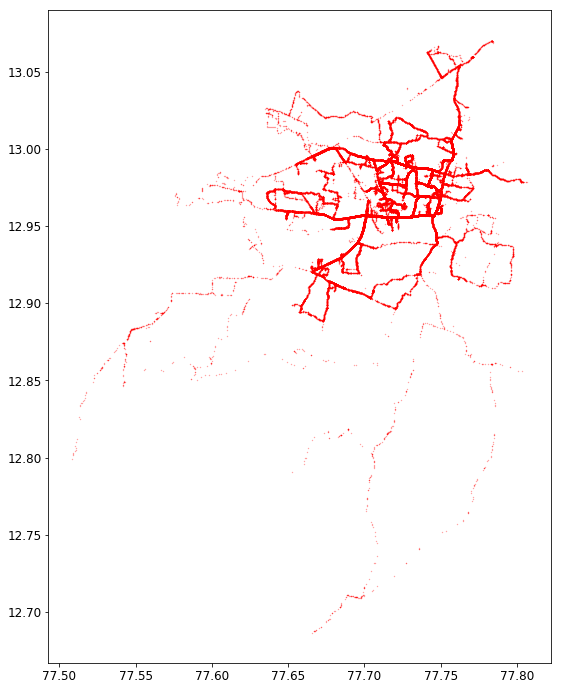

In [101]:
fig, axes = plt.subplots(figsize=(9,12))
axes.scatter(train_data.longitude, train_data.latitude, s=0.1, alpha=0.5, c='r')
plt.show()

### Before we explore each attribute in detail, let us plot all CDS alarm data on a map of Bangalore/Bengaluru by the co-ordinates specified, to generate a heatmap of locations and speed of vehicles at the time of alarm generation.
### On this heatmap, magnitude of speed is represented by color temperatures - cooler (bluish) plots indicate low speeds whereas warmer (reddish) colors represent higher speeds.

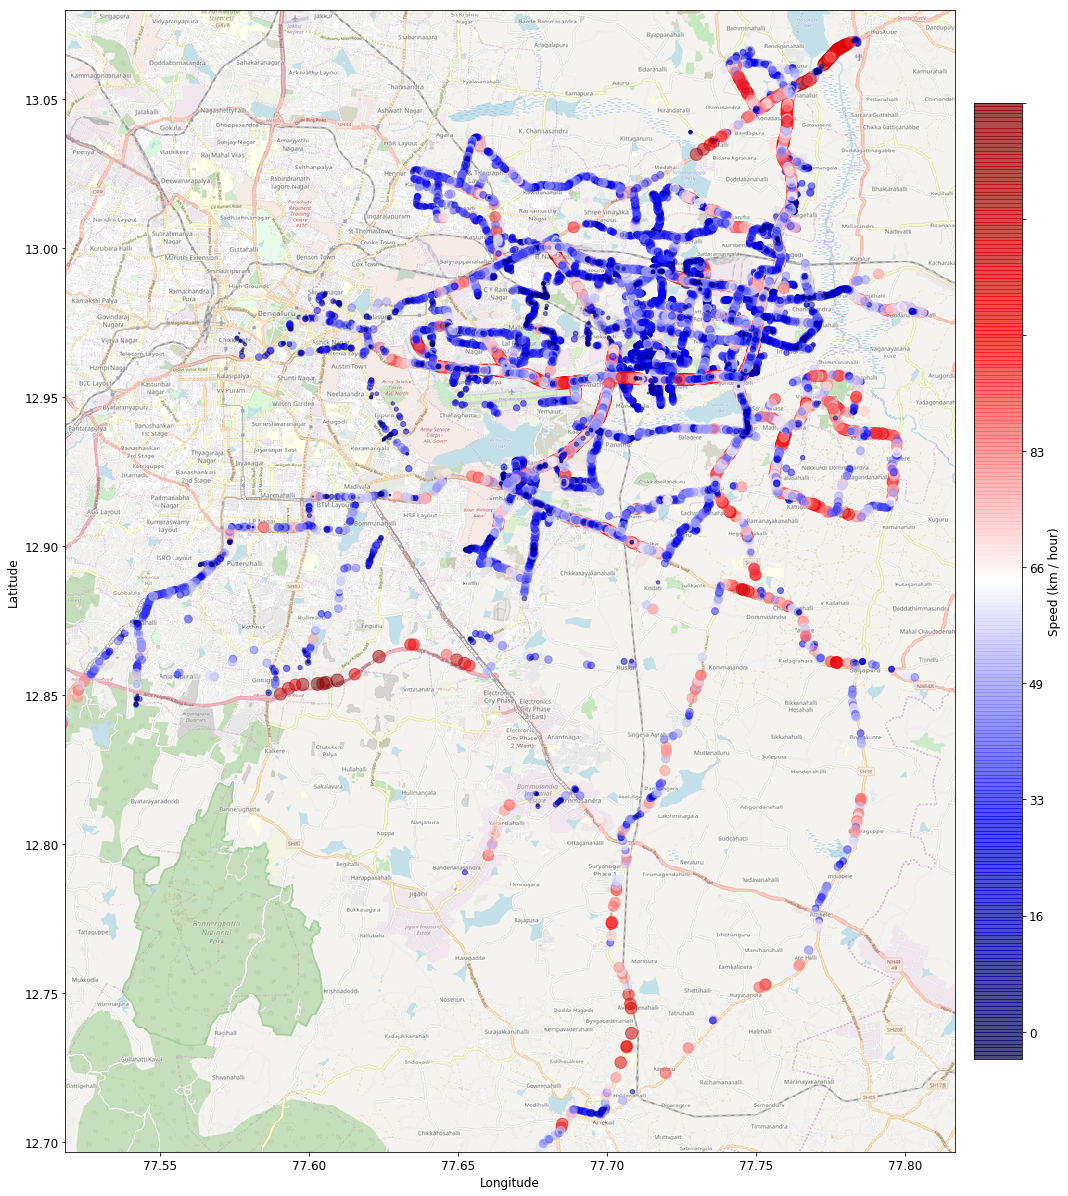

In [102]:
# Scatter plot with map
#bangalore_map_img = "bangalore_map.png"
#bangalore_map = plt.imread(os.path.join(input_data_dir, bangalore_map_img))

bangalore_map_img = 'https://uc38f9f93fed37e0c22351f88822.previews.dropboxusercontent.com/p/thumb/AAQ7d3ncrvTwY9bWZK4_swMT4_aCxlZz3keUzrCs2zJItiEf9OflNKugtphLu83KmzUtnRca-wPMxxrQitKSd7WiznukDlQkMOtIcYlgiGr79NcVeiBnl2WxCeRKd_8vXwfmjMxHKlQaxtzNWTnn2gMFJdQnRx33c7Ht-tGrKiqATadGhwewl-8Q_RtTUXig0AuAXlZuSkcXiWG_bea8xyJzy7b0skieyFSfcuVwoIyHpA/p.png?size=1280x960&size_mode=3'
bangalore_map = plt.imread(bangalore_map_img)
cmap = plt.get_cmap("seismic")

axes = train_data.plot(figsize=(15,20), kind='scatter', 
                    x='longitude', y='latitude', 
                    alpha=0.5, marker="o", s=train_data["speed"]*2,
                    c=train_data["speed"], cmap=cmap,
                    colorbar=False)

epsilon = 0.01
bound_box = [lon_min + epsilon, lon_max + epsilon, 
             lat_min + epsilon, lat_max + epsilon]
im = plt.imshow(bangalore_map, extent=bound_box, zorder=0, 
           cmap=cmap, interpolation='nearest', alpha=0.7)

axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")

# Colorbar
speed = train_data["speed"].values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)
cbar.set_label("Speed (km / hour)")
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])

plt.tight_layout()

#output_image = os.path.join(input_data_dir, "output_bangalore_map_traffic")
#plt.savefig(output_image + ".png", format='png', dpi=300)

plt.show()

### For a clearer view of the above image, save and download the image and zoom on the plots to reveal the names of the area and roads. A cross-reference against bigger map of Bangalore indicates the following:
Some of the areas where speed is relatively high - 
* Old Madras Road/Bangalore-Tirupati Highway
* Sarjapur Road
* Some parts of Outer Ring Road
* Anekal Main Road etc.

### We will explore the map by alarm type later to understand which areas are (in)famous for what type of incidents :-)

### Device Code
Code of the sensor device used in the bus. There are 26 different unique device codes present, which indicates the possibility that the entire data might have been collected from sensors of 26 buses.. 

In [103]:
unique_data = train_data['deviceCode'].unique()
print("Number of unique devices used in buses =", len(unique_data))

Number of unique devices used in buses = 26


### Ward Name
Name of the ward in which the alarm was generated.

In [104]:
# Capitalize ward name
train_data['wardName'] = train_data['wardName'].str.capitalize()
print("Total number of wards in CDS dataset:", len(train_data['wardName'].unique()))

Total number of wards in CDS dataset: 49


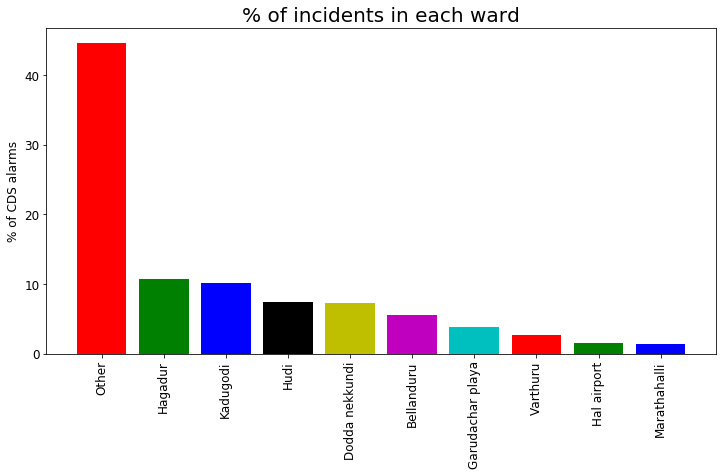

In [105]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['wardName'].value_counts(normalize=True).sort_values(ascending=False)
data = data.head(10)
axes.bar(data.index, data*100, color=my_colors)
axes.set_ylabel("% of CDS alarms")
axes.set_xticklabels(data.index, rotation=90)
axes.set_title("% of incidents in each ward")
plt.show()

### It is found that majority (~45%) incidents are captured against ward name as 'Other'. Data munging is required to clean this data and fill in the proper ward name.
### Here's the approch I've planned to find proper ward names:
1. Download the BBMP ward wise map file in GeoJSON format from [datameet repository](http://projects.datameet.org/Municipal_Spatial_Data/bangalore/).
2. Convert the GeoJSON file into CSV format and perform basic cleanup to remove uncessary information.
3. This file contains information of all BBMP ward including multi-polygon boundaries with co-ordinates, as well as the central latitude and longitude co-ordinates of the ward.
4. We'll use this lat/lon values to measure its distance from the lat/lon of the spot where CDS generated alarm. The ward whose lat/lon is closest to accident spot, will be assigned that ward name.
5. As you already guessed, we will apply K Nearest Neighbour approach to find the name of wards which are currently assigned to "Other". 

In [106]:
# Read data file
input_data_file = "bbmp-wards.csv"
input_data_path = os.path.join(input_data_dir, input_data_file)
bbmp_data = pd.read_csv(input_data_path)
bbmp_data.sample(5)

geometry                                        coordinates  \
83   MultiPolygon  77.59326154983839,13.005668092931302,77.593290...   
84   MultiPolygon  77.61826631184702,12.987757213751607,77.618376...   
13   MultiPolygon  77.63824983105167,13.07520594151501,77.6381771...   
48   MultiPolygon  77.57882965853992,13.006343518148528,77.578819...   
153  MultiPolygon  77.60579635976646,12.949978242548953,77.605843...   

     OBJECTID  ASS_CONST_       ASS_CONST1  WARD_NO             WARD_NAME  \
83         84         162    Shivaji Nagar       63             Jayamahal   
84         85         162    Shivaji Nagar       90               Halsoor   
13         14         152  Byatarayanapura        6           Thanisandra   
48         49         157      Malleswaram       65  Kadu Malleshwar Ward   
153       154         172    B.T.M. Layout      146           Lakkasandra   

     POP_M  POP_F  POP_SC  POP_ST  POP_TOTAL  AREA_SQ_KM        LAT  \
83   12014  12051    3291     380      24065        1.44  12.995107   
84   20526  15365    6474     866      35891        1.68  12.979704   
13   10384  10018    3924     147      20402        9.97  13.056525   
48   16970  17083     612     138      34053        1.36  13.002385   
153  14909  13394    4562     422      28303        1.29  12.941109   

           LON                   RESERVATIO  
83   77.599931              General (Women)  
84   77.619822              Scheduled Caste  
13   77.622411  Backward Category A (Women)  
48   77.568491        Backward Category - A  
153  77.604804                      General

In [107]:
# Capitalize ward name
bbmp_data['WARD_NAME'] = bbmp_data['WARD_NAME'].str.capitalize()
print("Total number of wards in BBMP dataset:", len(bbmp_data['WARD_NAME'].unique()))

# Create a dict mapping of ward number and names
ward_numbers = bbmp_data['WARD_NO'].unique()
ward_names = bbmp_data['WARD_NAME'].unique()
ward_dict = dict(zip(ward_numbers, ward_names))

Total number of wards in BBMP dataset: 198


In [108]:
# Apply KNN classification
# Input: Lat, Lon, Output: Ward No (since this is numeric variable)
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn_clf.fit(bbmp_data[['LAT', 'LON']], bbmp_data['WARD_NO'])

# Estimate ward no in train_data from learnt model of bbmp_data
train_data['estimatedWardNo'] = knn_clf.predict(train_data[['latitude', 'longitude']])
# Estimate ward name in train_data from the ward no - ward name mapping dictionary
train_data['estimatedWardName'] = train_data['estimatedWardNo'].map(ward_dict)

In [109]:
# Check accuracy
validation_orig = train_data['wardName'][~train_data['wardName'].str.contains('Other')]
validation_estimated = train_data['estimatedWardName'][~train_data['wardName'].str.contains('Other')]
accuracy = np.mean(validation_orig == validation_estimated)
print("Out of ward names which are not 'Other', % of accurate predictions =", accuracy*100)

Out of ward names which are not 'Other', % of accurate predictions = 62.588597842835135


### Even though all the estimated ward names do not match with original ward names in dataset, a close examination of multiple rows indicate that the estimated ward are very close (geographically) and are differing for lat/lon on the ward borders. Hence, we'll use the estimated ward names for futher analysis.

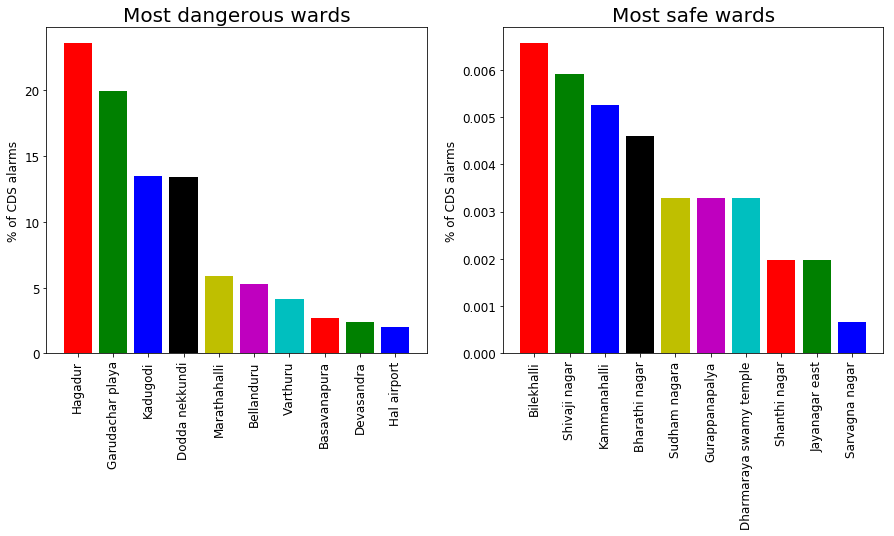

In [110]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))
data = train_data['estimatedWardName'].value_counts(normalize=True).sort_values(ascending=False)
data1 = data.head(10)

axes1.bar(data1.index, data1*100, color=my_colors)
axes1.set_ylabel("% of CDS alarms")
axes1.set_xticklabels(data1.index, rotation=90)
axes1.set_title("Most dangerous wards")

data2 = data.tail(10)
axes2.bar(data2.index, data2*100, color=my_colors)
axes2.set_ylabel("% of CDS alarms")
axes2.set_xticklabels(data2.index, rotation=90)
axes2.set_title("Most safe wards")

plt.show()

### Alarm Types
Detailed explanation of the alarm types have been provided at the beginning of this notebook.

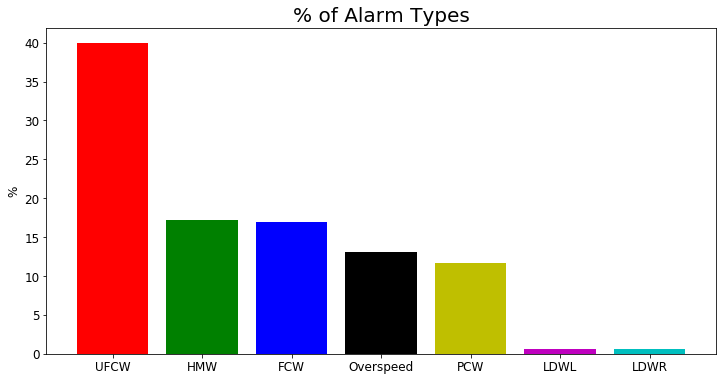

In [111]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['alarmType'].value_counts(normalize=True)
axes.bar(data.index, data*100, color=my_colors)
axes.set_title('% of Alarm Types')
axes.set_xlabel('')
axes.set_ylabel('%')
plt.show()

### Interesting observation: Majority of the alarms are of type UFCW, which are generated for potential collision at low speed. This implies that speed is not the most important reason of accidents on Bangalore roads. At the same time, this corroborates the recent finding that average speed of traffic is low in Bangalore roads. 
### Since HMW and FCW provide alarm on imminent rear-end collisions and speeds more than 30 kmph, both can be classified into single category called High Speed Collision Warning (HSCW). Let's also rename UFCW to Low Speed Collision Warning (LSCW). Simlarly, LDWL and LDWR can be brought under the umbrella of LDW. So, alarm types will be categorized in the following - HSCW, LSCW, PCW, LDW and Overspeed.

In [112]:
alarm_mapping = {"UFCW":"LSCW", "HMW":"HSCW", "FCW":"HSCW", "LDWL":"LDW", "LDWR":"LDW", "Overspeed":"Overspeed", "PCW":"PCW"}
train_data['alarmTypeCat'] = train_data['alarmType'].map(alarm_mapping)

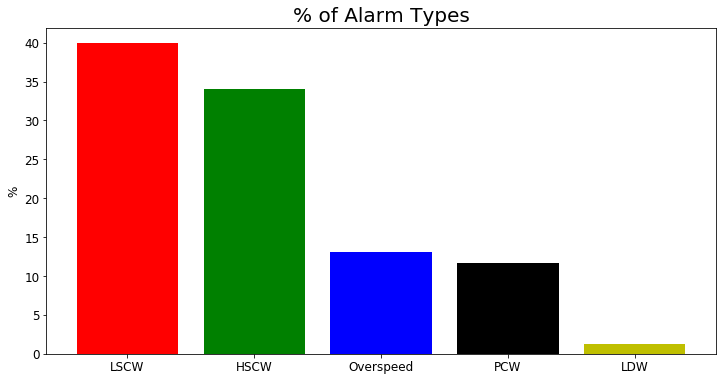

In [113]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['alarmTypeCat'].value_counts(normalize=True)
axes.bar(data.index, data*100, color=my_colors)
axes.set_title('% of Alarm Types')
axes.set_xlabel('')
axes.set_ylabel('%')
plt.show()

### Observations on Alarm Types:
1. Rear-end collision with vehicle in front has the highest occurances, with such collisions happening at low speed being highest.
2. Number of instances of rear-end collision at high speed is also significantly high.
3. Overspeeding and collisions with pedentrians and cyclists are next biggest concerns.
4. Percentage of LDW is very low. However, that is most likely because most of the roads are not clearly marked with lane divider markers.

### Speed
The speed data that is available in the dataset is the speed recorded by buses at the time of alarm generation, and not overall speed of vehicles/buses on Bangalore roads. The highest speed that is recorded is 83 kmph, however the average speed is only 22 kmph. 

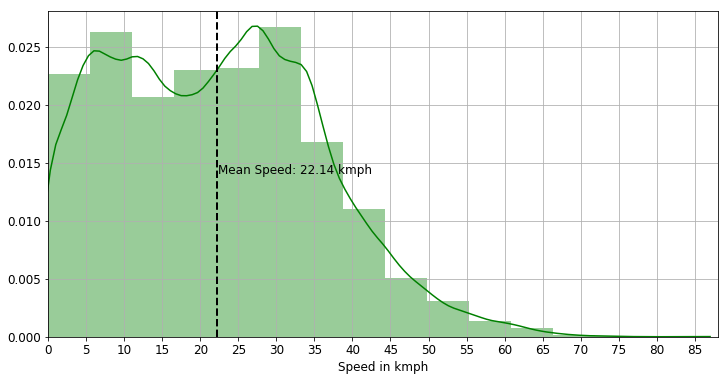

In [114]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['speed']
#axes.hist(data, bins=15, color='green')
sns.distplot(data, bins=15, color='green')
axes.axvline(data.mean(), color='k', linestyle='dashed', linewidth=2)

axes.set_xticks(np.arange(0, data.max()+5, 5))
axes.set_xticklabels([str(val) for val in np.arange(0, data.max()+5, 5)])
axes.set_xlim(0, data.max()+5)
axes.set_xlabel('Speed in kmph')
axes.grid(True)

_ymin, _ymax = axes.get_ylim()
axes.text(data.mean() + data.mean()/100,
          (_ymax+_ymin)*0.5,
          'Mean Speed: {:.2f} kmph'.format(data.mean()))

plt.show()

### Date and Time
The date and time in dataset are recorded in UTC timezone, hence these should be converted to IST. Next, let's look at the distribution of data by years, months, days of week and month, and hours of day.
Since the period over which the data was collected is very short, these diagrams will only provide a high level indication of the trends.

In [115]:
train_data.recordedDateTime = train_data.recordedDateTime.map(lambda x : pd.Timestamp(x, tz='Asia/Kolkata'))

In [116]:
print("Alarm data are spanning across:")
print("Years: ", train_data.recordedDateTime.dt.year.unique())
print("Months: ", train_data.recordedDateTime.dt.month_name().unique())
print("Dates: ", train_data.recordedDateTime.dt.day.unique())

Alarm data are spanning across:
Years:  [2018]
Months:  ['February' 'March' 'April' 'June' 'July']
Dates:  [ 1  2  3  5  6  7  8  9 12 14 15 16 19 20 21 22 23 24 25 26 27 28 10 13
 17 29 31  4 11 18 30]


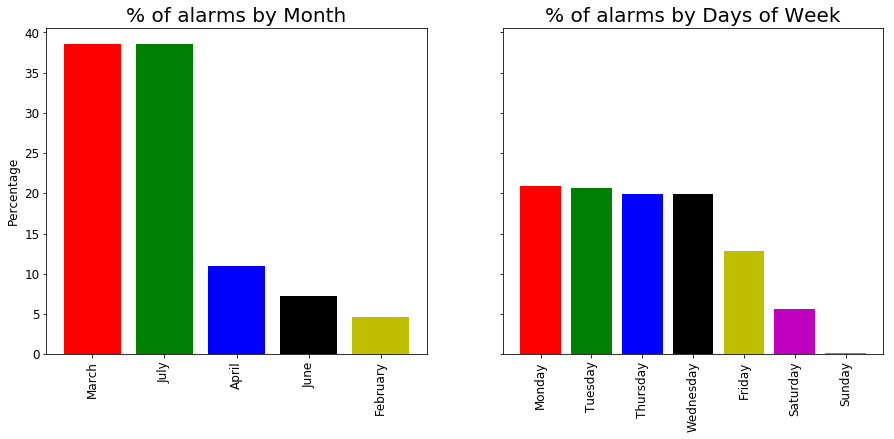

In [117]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
train_data["monthName"] = train_data.recordedDateTime.dt.month_name()
data = train_data["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of alarms by Month')

train_data["dayName"] = train_data.recordedDateTime.dt.day_name()
data = train_data["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of alarms by Days of Week')

plt.show()

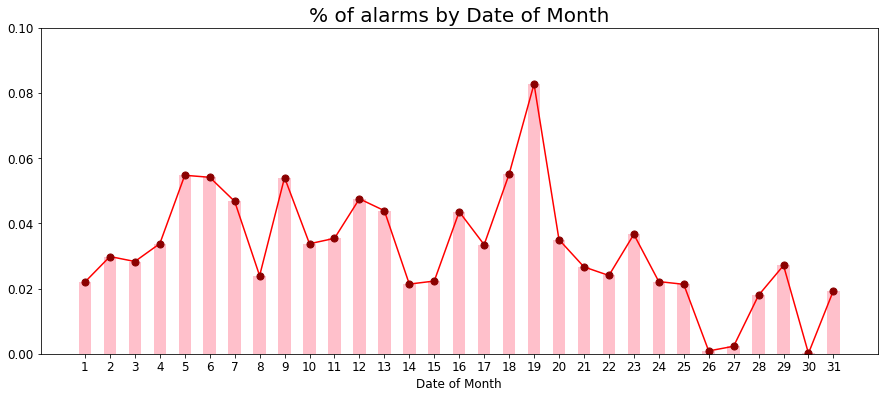

In [118]:
fig, axes = plt.subplots(figsize=(15,6))
train_data["dayOfMonth"] = train_data.recordedDateTime.dt.day
data = train_data["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of alarms by Date of Month')

plt.show()

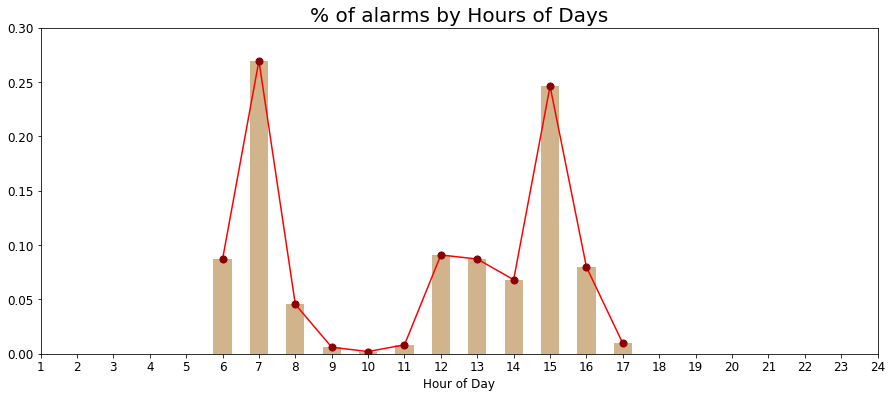

In [119]:
fig, axes = plt.subplots(figsize=(15,6))
train_data["hour"] = train_data.recordedDateTime.dt.hour
data = train_data["hour"].value_counts(normalize=True).sort_index()

axes.bar(data.index, data, color='tan', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Hour of Day')
axes.set_xticks(np.arange(1, 25))
axes.set_xticklabels([str(val) for val in np.arange(1, 25)])
axes.set_ylim(0, 0.3)
axes.set_title('% of alarms by Hours of Days')

plt.show()

### Observations about date and time:
1. As mentioned earlier, data for only 5 months are available, out of which, most of the incidents are recorded from March and July.
2. In a week, Monday to Thursday recorded most of the incidents, with the number gradually going down on Friday and weekends. Sunday has least number of alarms generated.
3. Among the days of a month, there's a peak on 19th. It needs further study to find if that is a significant one.
4. In a day, early morning (7-8AM) and early evening (3-4PM) recorded majority of the incidents. While early morning is a known peak-hour, evening peak traffic usually starts after 4PM. Hence further study is required to analyze this finding.

## So far we have explored each of the individual features. Now, let's try to unravel few interesting observations, by combining two or more features together.

### (1) A heatmap of locations in Bangalore by alarm types.
LSCW, HSCW, Overspeed and PCW and LDW (combined into one) - all 4 types of alarms are plotted on a map of Bangalore. In addition, hour of a day is represented as colormap, such that early hour are presented in cool colors (blueish), and warmer colors represent later parts of the day as the day progresses.

In [120]:
# Seggregate data by alarm types
data_lscw = train_data[train_data.alarmTypeCat == 'LSCW']
data_hscw = train_data[train_data.alarmTypeCat == 'HSCW']
data_speed = train_data[train_data.alarmTypeCat == 'Overspeed']
data_pcw = train_data[train_data.alarmTypeCat.str.contains('PCW', 'LDW')]

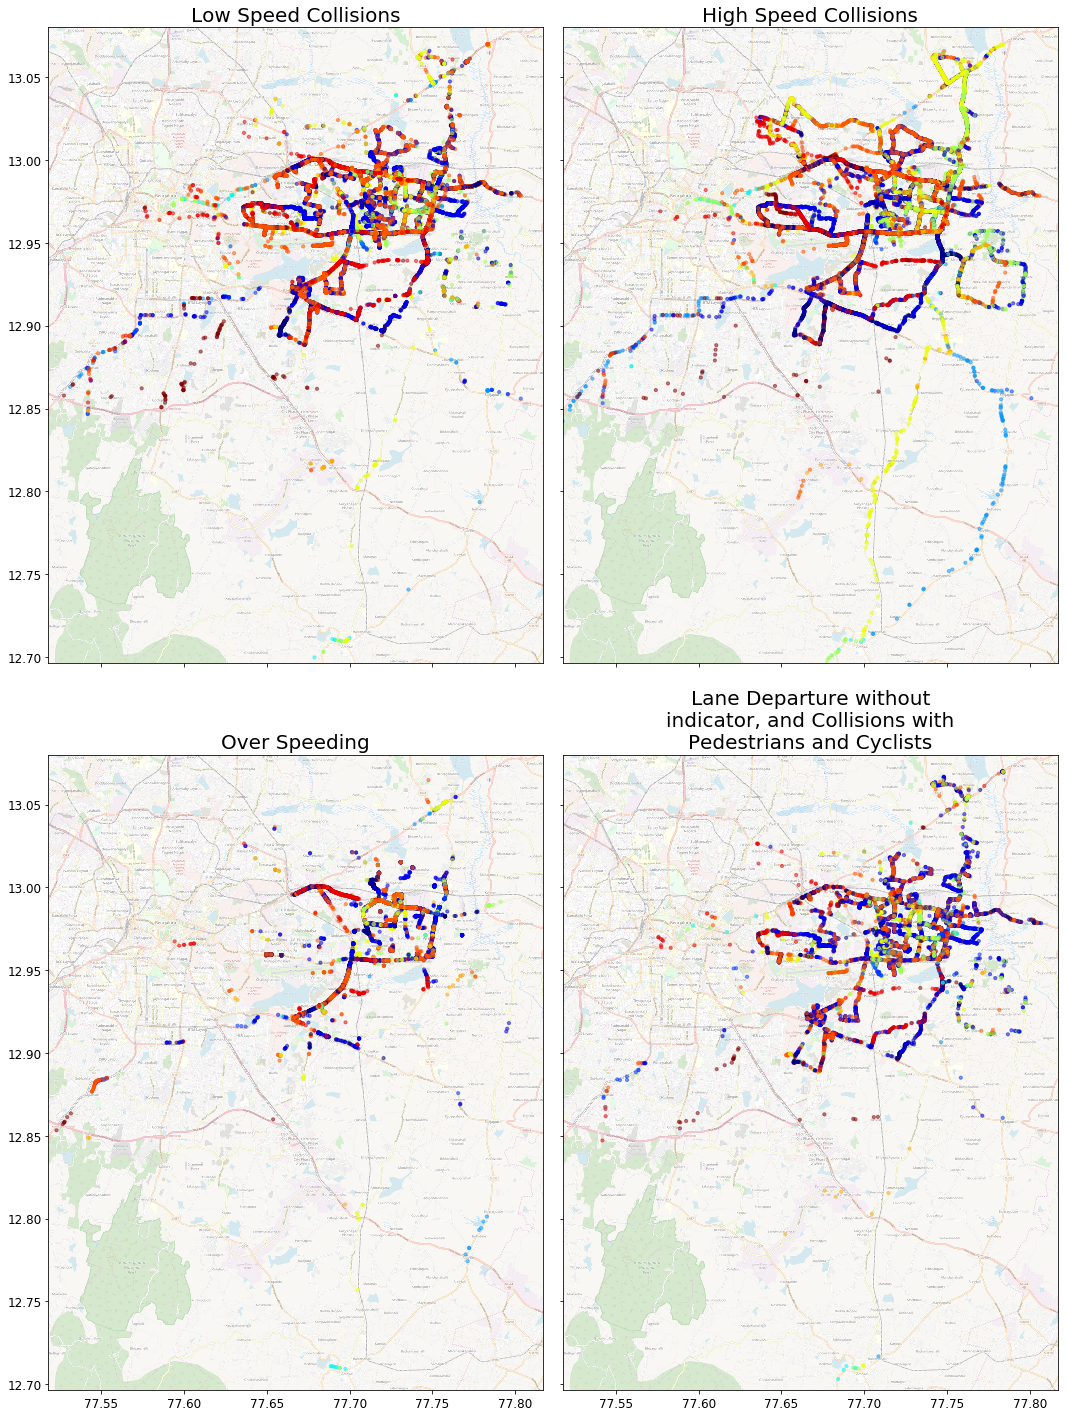

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(15,20), sharex=True, sharey=True)
cmap = plt.get_cmap("jet")

# Plot LSCW
axes[0][0].scatter(data_lscw.longitude, data_lscw.latitude,
                   alpha=0.5, marker="o", s=10,
                   c=data_lscw.hour, cmap=cmap, zorder=1)
axes[0][0].set_title("Low Speed Collisions")

# Plot HSCW
axes[0][1].scatter(data_hscw.longitude, data_hscw.latitude,
                   alpha=0.5, marker="o", s=10,
                   c=data_hscw.hour, cmap=cmap, zorder=1)
axes[0][1].set_title("High Speed Collisions")

# Plot Overspeed
axes[1][0].scatter(data_speed.longitude, data_speed.latitude,
                   alpha=0.5, marker="o", s=10,
                   c=data_speed.hour, cmap=cmap, zorder=1)
axes[1][0].set_title("Over Speeding")

# Plot PCW and LDW
axes[1][1].scatter(data_pcw.longitude, data_pcw.latitude,
                   alpha=0.5, marker="o", s=10,
                   c=data_pcw.hour, cmap=cmap, zorder=1)
axes[1][1].set_title("\n".join(wrap("Lane Departure without indicator, and Collisions with Pedestrians and Cyclists", 30)))

# Plot Bangalore map image
epsilon = 0.01
bound_box = [lon_min + epsilon, lon_max + epsilon, 
             lat_min + epsilon, lat_max + epsilon]

for ax in axes.flat:
    im = ax.imshow(bangalore_map, extent=bound_box,
                      alpha=0.5, zorder=0, cmap=cmap)

plt.tight_layout()
plt.show()

### Observation: The above heatmap clearly indicates that all kinds of alarms were generated from all over Bangalore. Hence, even though certain types of accidents are more frequent in certain areas (for example, overspeeding is more prevalent on highways), accidents are potentially possible all over the city.

### (2) A distribution of speed for each of these accident/alarm types.

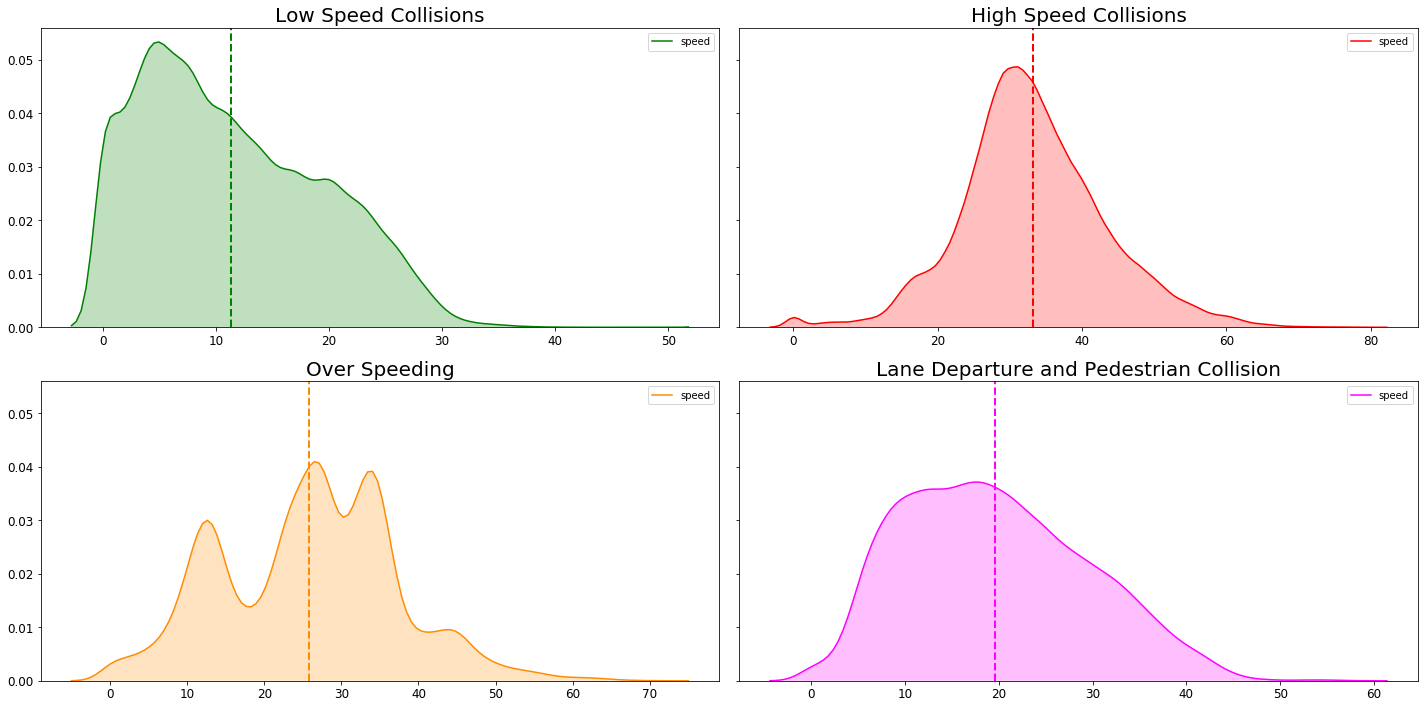

In [122]:
fig, axes = plt.subplots(2, 2, figsize=(20,10), sharey=True)

# LSCW
sns.kdeplot(data_lscw.speed, color='green', shade=True, ax=axes[0][0])
axes[0][0].axvline(data_lscw.speed.mean(), color='green', linestyle='dashed', linewidth=2)
axes[0][0].set_title('Low Speed Collisions')

# LSCW
sns.kdeplot(data_hscw.speed, color='red', shade=True, ax=axes[0][1])
axes[0][1].axvline(data_hscw.speed.mean(), color='red', linestyle='dashed', linewidth=2)
axes[0][1].set_title('High Speed Collisions')

# LSCW
sns.kdeplot(data_speed.speed, color='darkorange', shade=True, ax=axes[1][0])
axes[1][0].axvline(data_speed.speed.mean(), color='darkorange', linestyle='dashed', linewidth=2)
axes[1][0].set_title('Over Speeding')

# LSCW
sns.kdeplot(data_pcw.speed, color='magenta', shade=True, ax=axes[1][1])
axes[1][1].axvline(data_pcw.speed.mean(), color='magenta', linestyle='dashed', linewidth=2)
axes[1][1].set_title('Lane Departure and Pedestrian Collision')

plt.tight_layout()
plt.show()

### Observations:
1. Low speed collisions happen at an average speed of 11-12 kmph.
2. High speed collisions happen at an average speed of approx 35 kmph, with many instances of higher speeds.
3. Overspeeding is reported at an average of 25 kmph speed.
4. Average speed of lane departures without indicators, and collisions with pedestrians and cyclists is 20 kmph.

### (3) Which areas are notorious for which kind of accidents?

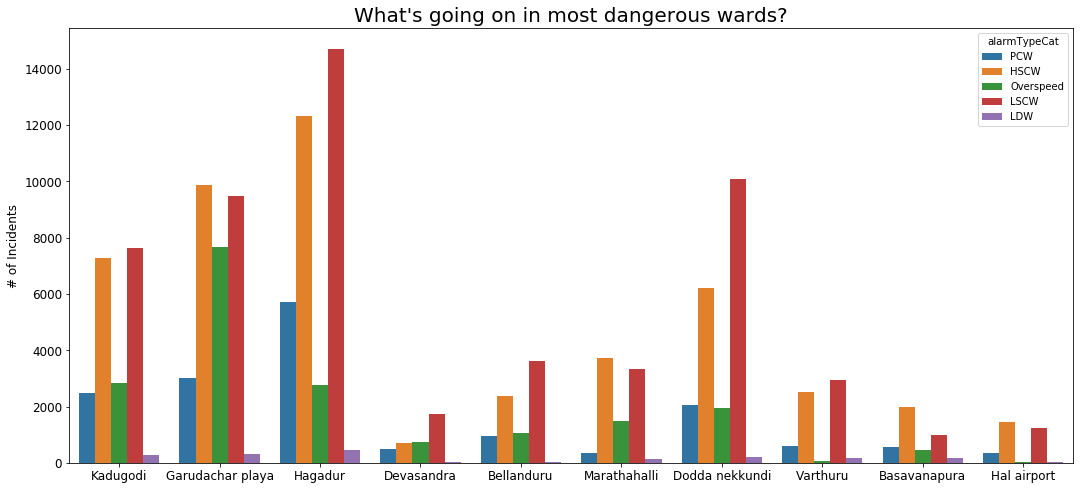

In [123]:
fig, axes = plt.subplots(figsize=(18,8))
data = train_data['estimatedWardName'].value_counts(normalize=True).sort_values(ascending=False)
data = data.head(10)
ward_top = data.index

ward_top_data = train_data[train_data.estimatedWardName.isin(ward_top)]
sns.countplot(x='estimatedWardName', hue='alarmTypeCat', data=ward_top_data, ax=axes)

axes.set_xlabel('')
axes.set_ylabel('# of Incidents')
axes.set_title('What\'s going on in most dangerous wards?')

plt.show()

### Observations:
1. Most incidents of high and low speed collisions happen in Hagadur.
2. Overspeeding is most common in Garudachar Playa.
3. Hagadur is infamous for collisions with pedestrians and cyclist as well, not to mention lane change without indicators.

### (4) Know the top 10 most dangerous wards on a map of Bangalore

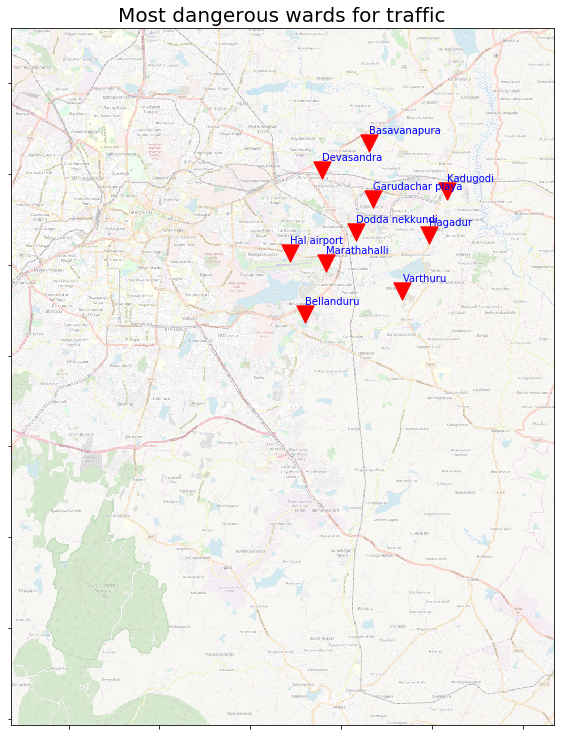

In [124]:
fig, axes = plt.subplots(figsize=(8,12))
cmap = plt.get_cmap("jet")

data = bbmp_data[bbmp_data.WARD_NAME.isin(ward_top)]

axes.scatter(data.LON, data.LAT, marker="v", s=300,
                   c='red', zorder=1)
axes.set_title("Most dangerous wards for traffic")

# Plot Bangalore map image
epsilon = 0.01
bound_box = [lon_min + epsilon, lon_max + epsilon, 
             lat_min + epsilon, lat_max + epsilon]

axes.imshow(bangalore_map, extent=bound_box, alpha=0.5, zorder=0)

for _idx, _ward_data in data.iterrows():
    axes.text(_ward_data.LON, _ward_data.LAT + epsilon/2, 
              _ward_data.WARD_NAME, color='blue', fontsize=10)

axes.set_yticklabels([])
axes.set_xticklabels([])

plt.tight_layout()
plt.show()